<a href="https://colab.research.google.com/github/kim-hyun-ho/study/blob/main/%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd

In [18]:
np.random.seed(4)
m=60
w1,w2=0.1,0.3
noise=0.1

# randn :표준 정규 분포 ( N(0,1) 즉, 평균이 0이고 표준편차가 1인 분포)
# rand  :0은 들어가지만 1은 들어가지 않는 균등분포
angles = np.random.rand(m)*3*np.pi/2-0.5
X=np.empty((m,3)) # 빈배열 만들기
X[:,0]=np.cos(angles)+np.sin(angles)/2+noise*np.random.randn(m)/2
X[:,1]=np.sin(angles)*0.7 + noise*np.random.randn(m)/2
X[:,2]=X[:,0] * w1 + X[:,1]*w2 + noise*np.random.randn(m)

X[:5]
X.shape

(60, 3)

In [19]:
df=pd.DataFrame(X, columns=['X_1','X_2','X_3'])
df.head(5)

,X_1,X_2,X_3
0,-1.015700,-0.550913,-0.261326
1,-0.007717,0.599586,0.035078
2,-0.953171,-0.464537,-0.249203
3,-0.920123,0.210096,0.021824
4,-0.763097,0.158261,0.191525


In [20]:
#고육값 분해를 이용한 PCA 구하기
#먼저 공부산 행렬을 구해야 함.

X_cen=X-X.mean(axis=0) #평균을 0으로
X_cov=np.dot(X_cen.T,X_cen)/59
print(X_cov)

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [21]:
#같은 결과
np.cov(X_cen.T)

array([[0.69812855, 0.17640539, 0.12137931],
       [0.17640539, 0.1801727 , 0.07253614],
       [0.12137931, 0.07253614, 0.04552382]])

In [22]:
X.mean(axis=0)

array([0.02406745, 0.20932515, 0.07155422])

In [23]:
#공분산행렬에서 고윳값 고유벡터 구해진다.
w,v = np.linalg.eig(X_cov)
print('eigenvalue : ',w)
print('eigenvector : \n',v)

eigenvalue :  [0.77830975 0.1351726  0.01034272]
eigenvector : 
 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [24]:
print('explained variance ration : ', w/w.sum())

explained variance ration :  [0.84248607 0.14631839 0.01119554]


#SVD를 이용한 PCA

In [25]:
U,D,V_t = np.linalg.svd(X_cen)
print('singular value :',D)
print('singular vector :\n',V_t.T)

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [26]:
print('explained variance ration :',D**2/np.sum(D**2))

explained variance ration : [0.84248607 0.14631839 0.01119554]


#Scikit-Learn을 이용한 PCA

In [28]:
#자동으로 해준다.행렬 부호가 다른것은 벡터 방향이 다를 뿐 축은 동일하다.

from sklearn.decomposition import PCA

pca=PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
print('singular value : ', pca.singular_values_)
print('singular vector : \n',pca.components_.T)

singular value :  [6.77645005 2.82403671 0.78116597]
singular vector : 
 [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]


In [32]:
#고유값, 벡터도 확인가능
print('eigen_value : ', pca.explained_variance_)
print('explained variance ration : ',pca.explained_variance_ratio_)

eigen_value :  [0.77830975 0.1351726  0.01034272]
explained variance ration :  [0.84248607 0.14631839 0.01119554]


In [36]:
#Explained Variance Ration : 투영후 분산의 비율

pc1, pc2, pc3 = v[:,0],v[:,1],v[:,2] #v : 고유백터
prj1,prj2,prj3 = np.dot(X,pc1), np.dot(X,pc2), np.dot(X,pc3)

prj_list = np.array([prj1.var(), prj2.var(), prj3.var()])

print('variance(==eigenvalue) :',prj_list)
print('explained variance ratio :',prj_list/prj_list.sum())

variance(==eigenvalue) : [0.76533792 0.13291972 0.01017034]
explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [37]:
#sklearn에서는 더 쉽게
print('explained variance ration : ', pca.explained_variance_ratio_)

explained variance ration :  [0.84248607 0.14631839 0.01119554]


In [60]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum >= 0.95)+1
print('선택할 차원 수 :',d)

선택할 차원 수 : 2


In [62]:
pca = PCA(n_components=0.95)
X_prj = pca.fit_transform(X)
print('principal component vec :\n',pca.components_.T)

principal component vec :
 [[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]


#pca 실습

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix

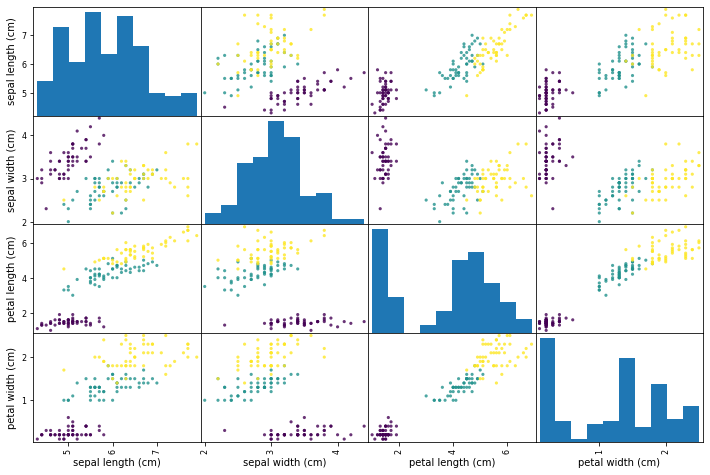

In [64]:
iris = datasets.load_iris()
dataframe = pd.DataFrame(iris['data'],columns=iris['feature_names'])
scatter_matrix(dataframe, c=iris['target'], marker='o', s=10, alpha=.8, figsize=(12,8))
plt.show()

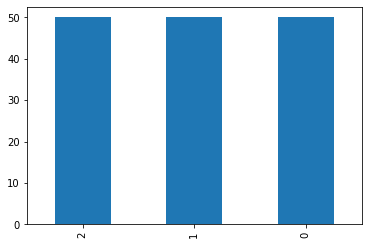

In [66]:
X=iris.data
y=iris.target
feature_names=iris.feature_names

df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)
df_y[0].value_counts().plot(kind='bar')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


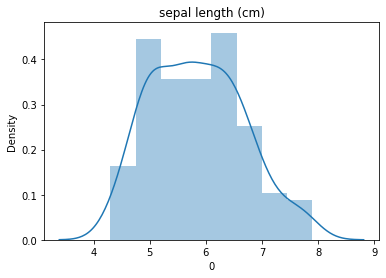

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


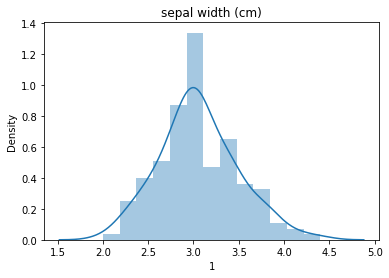

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


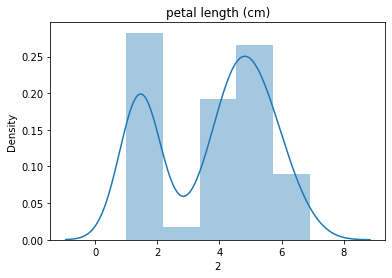

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


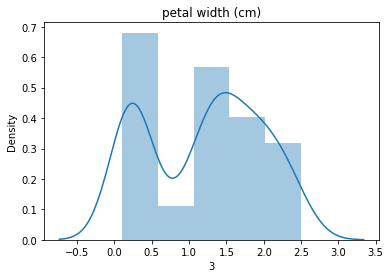

In [67]:
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

In [71]:
'''sklean으로 pca객체 생성및 pc값 구하기'''
pca=PCA()
pca.fit(X)
PC_score=pca.transform(X)
PC_score[:5]
# PC_score.shape
# X.shape

(150, 4)

In [72]:
#pca의 eigen_vector
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [75]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [76]:
ratio = pca.explained_variance_ratio_
ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

,V_ratio
PC1,0.924619
PC2,0.053066
PC3,0.017103
PC4,0.005212


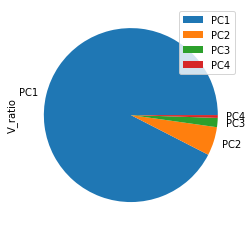

In [77]:
df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3','PC4'], columns=['V_ratio'])
df_v.plot.pie(y='V_ratio')
df_v

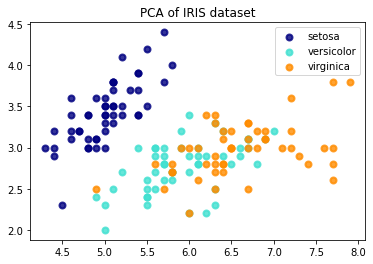

In [79]:
plt.figure()
color=['navy','turquoise','darkorange']
lw=2

for color,i,target_name in zip(color,[0,1,2],iris.target_names):
    plt.scatter(X[y==i,0], X[y==i,1], color=color, alpha=0.8, lw=lw, label=target_name)
    plt.legend(loc='best',shadow=False, scatterpoints=1)
    plt.title('PCA of IRIS dataset')